In [106]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
b1 = pd.read_csv("Data/Bumblebee_data_climate_Marshall_et_al_2020.csv")
b2 = pd.read_csv("Data/Bumblebee_data_Marshall_et_al_2020.csv")
plants = pd.read_csv("Data/Plant_data_Marshall_et_al_2020.csv")
print(b1.shape)
print(b2.shape)
print(plants.shape)

(854, 11)
(911, 8)
(1699, 9)


In [108]:
# Lire un fichier CSV compressé en Gzip
data_1863_1949 = pd.read_csv("Data/Q_65_1863-1949_RR-T-Vent.csv.gz",sep=';')
data_1950_2023 = pd.read_csv("Data/Q_65_previous-1950-2023_RR-T-Vent.csv.gz",sep=';')

data_1950_2023['AAAAMMJJ'] = pd.to_datetime(data_1950_2023['AAAAMMJJ'], format='%Y%m%d')


# Filtrer les entrées où l'année est <= 2006 pour être en accord avec l'article des bourdons 
data_1950_2006 = data_1950_2023[data_1950_2023['AAAAMMJJ'].dt.year <= 2006]

# Compter le nombre d'entrées correspondantes
nombre_entrees = data_1950_2006.shape[0]

print(f"Nombre d'entrées entre 1950 et 2006 : {nombre_entrees}")
print(data_1950_2023.shape)

Nombre d'entrées entre 1950 et 2006 : 646571
(864881, 58)


In [109]:
# On separe les noms des listes en qualités et données
qualite = ['QRR', 'QTN', 'QHTN', 'QTX', 'QHTX', 'QTM', 'QTNTXM', 'QTAMPLI', 'QTM', 'QTNSOL', 'QTN50', 'QDG', 'QFFM', 'QFF2M', 'QFXY', 'QDXY', 'QHXY', 'QFXI', 'QDXI','QHXI', 
           'QFXI2', 'QDXI2', 'QHXI2', 'QFXI3S', 'QDXI3S', 'QHXI3S', 'QDRR']

donnees = [col for col in data_1863_1949.columns if col not in qualite]

print(f'donnees: {donnees}')
print(f'qualite: {qualite}')                                                        

donnees: ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TNTXM', 'TAMPLI', 'TNSOL', 'TN50', 'DG', 'FFM', 'FF2M', 'FXY', 'DXY', 'HXY', 'FXI', 'DXI', 'HXI', 'FXI2', 'DXI2', 'HXI2', 'FXI3S', 'DXI3S', 'HXI3S', 'DRR']
qualite: ['QRR', 'QTN', 'QHTN', 'QTX', 'QHTX', 'QTM', 'QTNTXM', 'QTAMPLI', 'QTM', 'QTNSOL', 'QTN50', 'QDG', 'QFFM', 'QFF2M', 'QFXY', 'QDXY', 'QHXY', 'QFXI', 'QDXI', 'QHXI', 'QFXI2', 'QDXI2', 'QHXI2', 'QFXI3S', 'QDXI3S', 'QHXI3S', 'QDRR']


In [110]:
b1.columns, b2.columns


(Index(['Longitude', 'Latitude', 'Visitor', 'Plant', 'Date', 'Site', 'Data',
        'MinEle', 'MaxEle', 'EleZone', 'clim'],
       dtype='object'),
 Index(['Visitor', 'Plant', 'Date', 'Site', 'Data', 'MinEle', 'MaxEle',
        'EleZone'],
       dtype='object'))

In [111]:
unique_bb1 = b1["Visitor"].unique()
unique_bb2 = b2["Visitor"].unique()
unique_visitors3 = plants["Visitor"].unique()

all_unique_bb = set(unique_bb1) | set(unique_bb2)  
all_unique_bb = list(all_unique_bb)  

print(all_unique_bb)

['Bombus lapidarius', 'Bombus sylvestris', 'Bombus mendax', 'Bombus terrestris complex', 'Bombus sylvarum', 'Bombus pyrenaeus', 'Bombus pratorum', 'Bombus mucidus', 'Bombus rupestris', 'Bombus quadricolor', 'Bombus sichelii', 'Bombus ruderarius', 'Bombus monticola', 'Bombus soroeensis', 'Bombus mesomelas', 'Bombus gerstaeckeri', 'Bombus humilis', 'Bombus pascuorum', 'Bombus wurflenii', 'Bombus hortorum', 'Bombus bohemicus']


/tmp/ipykernel_1049/457329974.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_combined["Date"] = pd.to_datetime(df_combined["Date"], errors="coerce")


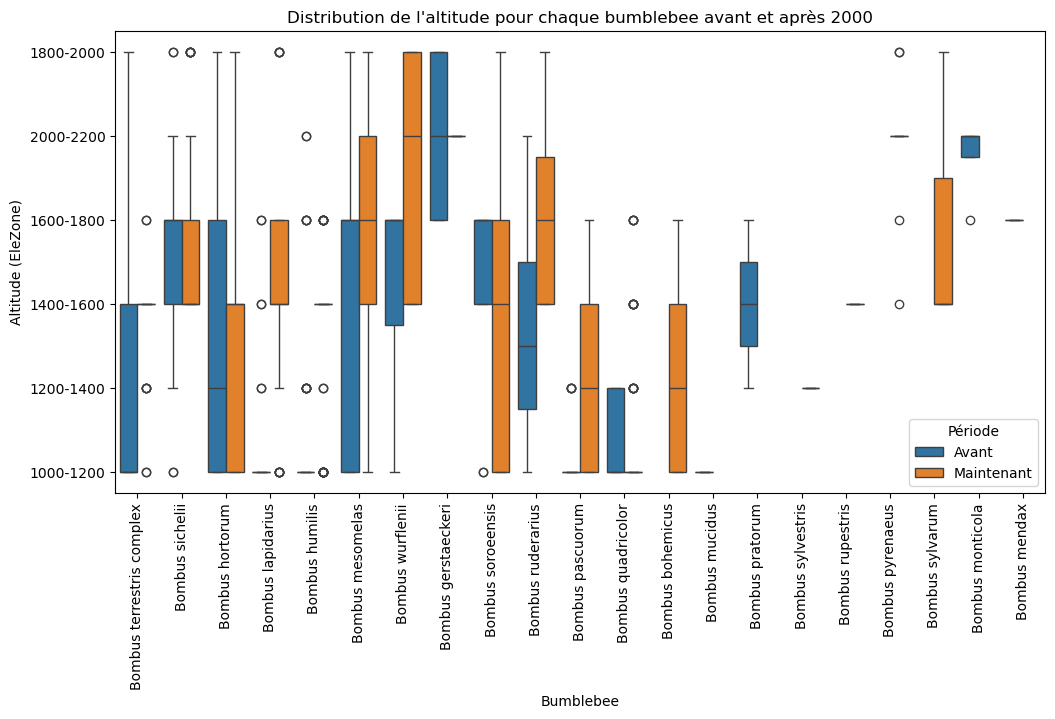

In [112]:

# Fusionner les datasets
df_combined = pd.concat([b1, b2])

# Convertir la colonne "Date" en format datetime et extraire l'année
df_combined["Date"] = pd.to_datetime(df_combined["Date"], errors="coerce")
df_combined["Year"] = df_combined["Date"].dt.year

# Filtrer les données valides (exclure les années NaN)
df_combined = df_combined.dropna(subset=["Year"])

# Identifier les périodes
df_combined["Period"] = df_combined["Year"].apply(lambda x: "Avant" if x < 2000 else "Maintenant")

# Tracer le boxplot séparé par période
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x="Visitor", y="EleZone", hue="Period")

# Personnalisation du graphique
plt.xticks(rotation=90)
plt.xlabel("Bumblebee")
plt.ylabel("Altitude (EleZone)")
plt.title("Distribution de l'altitude pour chaque bumblebee avant et après 2000")
plt.legend(title="Période")
plt.show()

In [113]:
df_combined


,Longitude,Latitude,Visitor,Plant,Date,Site,Data,MinEle,MaxEle,EleZone,clim,Year,Period
0,-0.041130,42.74037,Bombus terrestris complex,Carduus carlinoides,1889-08-18,Port de Gavarnie,MacLeod,1900,1900,1800-2000,10.5,1889,Avant
1,-0.038612,42.74206,Bombus sichelii,Carduus defloratus,1889-08-18,Port de Gavarnie,MacLeod,1800,1800,1800-2000,10.9,1889,Avant
2,-0.036181,42.70804,Bombus sichelii,Carduus carlinoides,1889-08-15,weg naar de Br�che de Roland (Gavarnie),MacLeod,2000,2000,2000-2200,9.9,1889,Avant
3,-0.035850,42.74282,Bombus hortorum,Scutellaria alpina,1889-08-18,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4,1889,Avant
4,-0.035850,42.74282,Bombus lapidarius,Carduus carlinoides,1889-08-18,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4,1889,Avant
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,NaN,NaN,Bombus mesomelas,Aconitum sp.,2006-08-27,P362,Survey2005-06,2150,2150,2000-2200,NaN,2006,Maintenant
907,NaN,NaN,Bombus gerstaeckeri,Aconitum sp.,2006-08-27,P362,Survey2005-06,2150,2150,2000-2200,NaN,2006,Maintenant
908,NaN,NaN,Bombus pyrenaeus,Aconitum sp.,2006-08-27,P363,Survey2005-06,2150,2150,2000-2200,NaN,2006,Maintenant
909,NaN,NaN,Bombus mesomelas,Aconitum sp.,2006-08-27,P363,Survey2005-06,2150,2150,2000-2200,NaN,2006,Maintenant


/tmp/ipykernel_1049/1926279858.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plants['Date'] = pd.to_datetime(plants['Date'], errors='coerce')


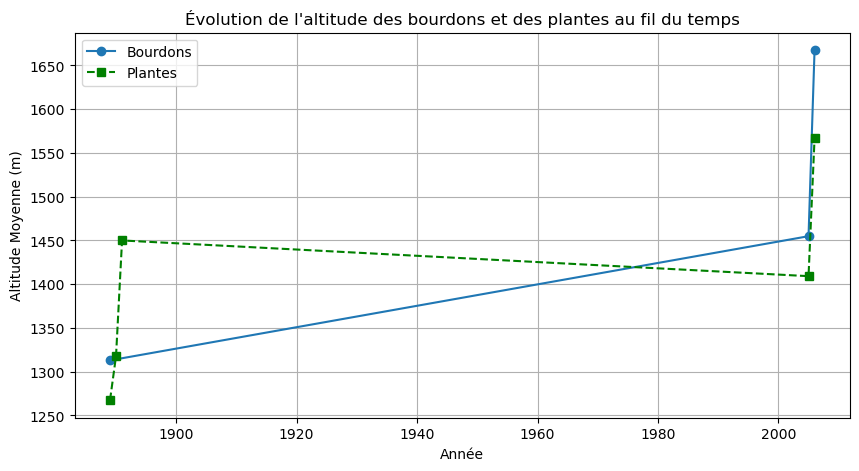

In [114]:
# Convertir la colonne 'Date' en format datetime
plants['Date'] = pd.to_datetime(plants['Date'], errors='coerce')

# Filtrer les données valides (en cas de NaN dans la conversion)
df_valid = df_combined.dropna(subset=['Date', 'MinEle', 'MaxEle'])
plants_valid = plants.dropna(subset=['Date', 'MinEle', 'MaxEle'])

# Calculer l'altitude moyenne
df_valid['MeanEle'] = (df_valid['MinEle'] + df_valid['MaxEle']) / 2
plants_valid['MeanEle'] = (plants_valid['MinEle'] + plants_valid['MaxEle']) / 2

# Grouper par année pour une meilleure visualisation
df_valid['Year'] = df_valid['Date'].dt.year
plants_valid['Year'] = plants_valid['Date'].dt.year
df_grouped = df_valid.groupby('Year')['MeanEle'].mean()
plants_grouped = plants_valid.groupby('Year')['MeanEle'].mean()

# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', label='Bourdons')
plt.plot(plants_grouped.index, plants_grouped.values, marker='s', linestyle='--', label='Plantes', color='green')
plt.xlabel('Année')
plt.ylabel('Altitude Moyenne (m)')
plt.title("Évolution de l'altitude des bourdons et des plantes au fil du temps")
plt.legend()
plt.grid()
plt.show()


/tmp/ipykernel_1049/2737516504.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_combined["Date"] = pd.to_datetime(df_combined["Date"], errors="coerce")


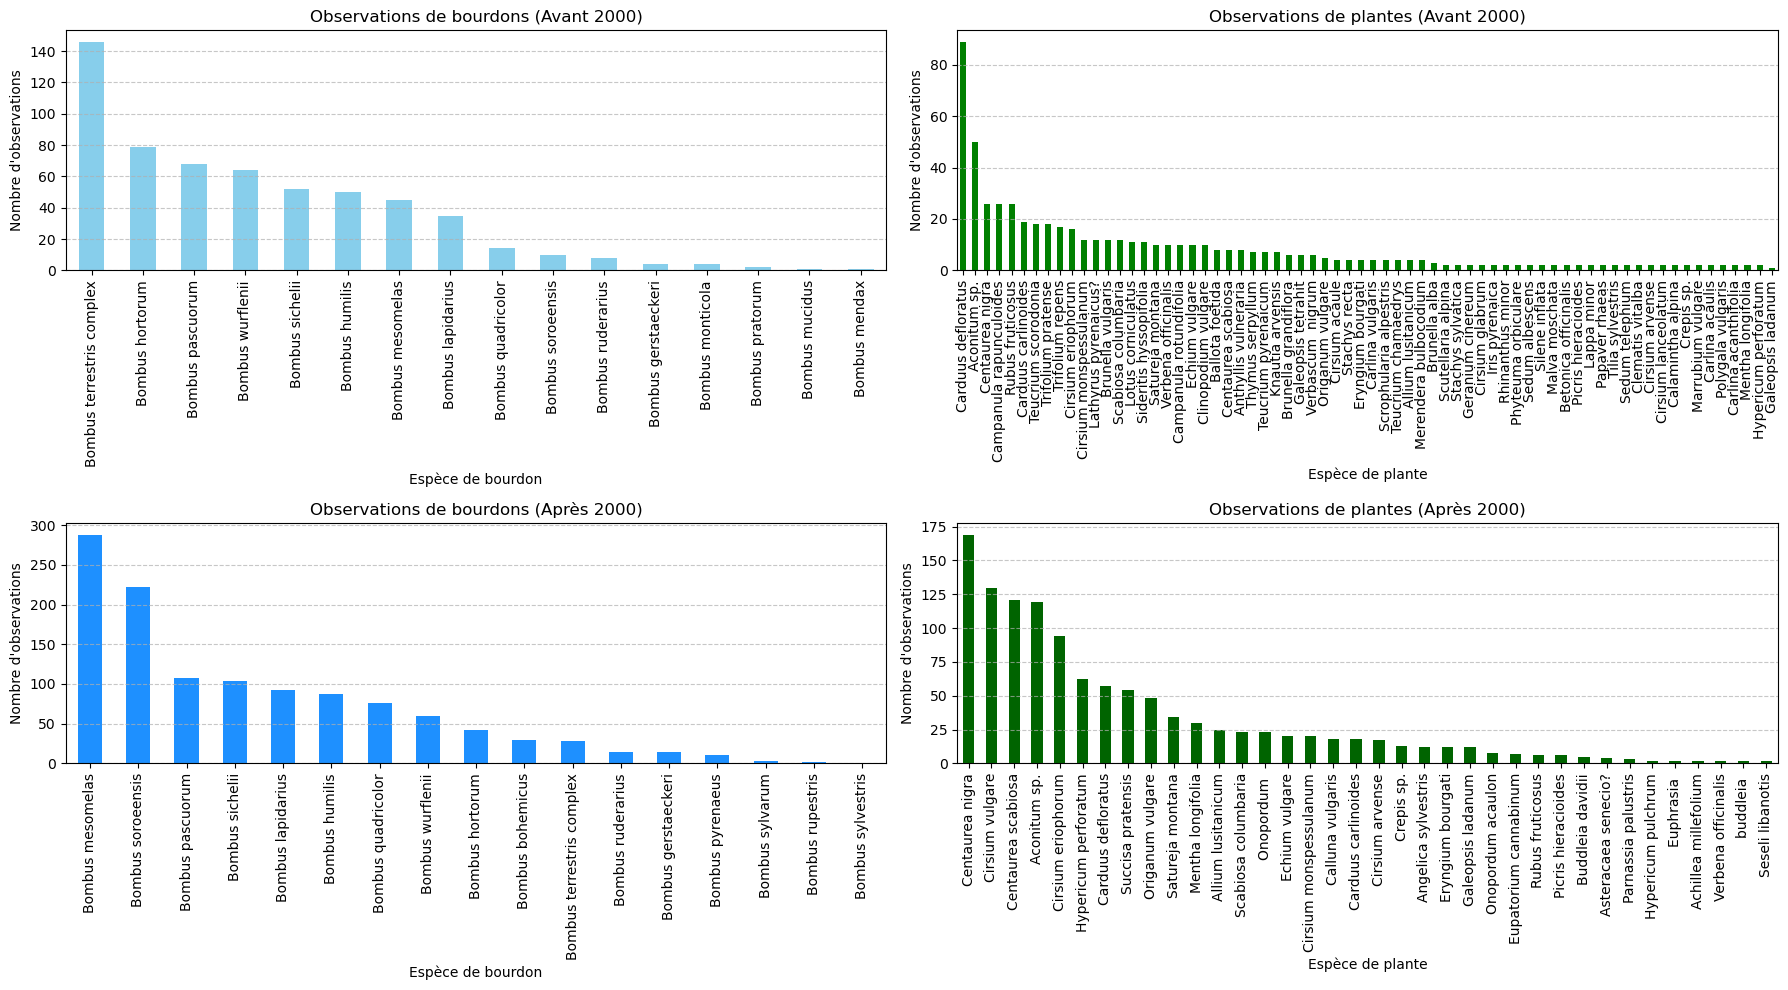

In [115]:
df_combined = pd.concat([b1, b2])

# Convertir la colonne "Date" en format datetime et extraire l'année
df_combined["Date"] = pd.to_datetime(df_combined["Date"], errors="coerce")
df_combined["Year"] = df_combined["Date"].dt.year

# Supprimer les valeurs NaN dans Year
df_combined = df_combined.dropna(subset=["Year"])

# Définir la période (Avant 2000 / Maintenant)
df_combined["Period"] = df_combined["Year"].apply(lambda x: "Avant" if x < 2000 else "Maintenant")

# Séparer les données en deux périodes
df_combined_avant = df_combined[df_combined["Period"] == "Avant"]
df_combined_maintenant = df_combined[df_combined["Period"] == "Maintenant"]

# Compter le nombre d'observations par espèce de bourdon et plante pour chaque période
visitor_counts_avant = df_combined_avant["Visitor"].value_counts()
plant_counts_avant = df_combined_avant["Plant"].value_counts()
visitor_counts_maintenant = df_combined_maintenant["Visitor"].value_counts()
plant_counts_maintenant = df_combined_maintenant["Plant"].value_counts()

# Créer les graphiques côte à côte (Avant vs Maintenant)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Graphiques pour la période "Avant"
visitor_counts_avant.plot(kind="bar", color="skyblue", ax=axes[0, 0])
axes[0, 0].set_xlabel("Espèce de bourdon")
axes[0, 0].set_ylabel("Nombre d'observations")
axes[0, 0].set_title("Observations de bourdons (Avant 2000)")
axes[0, 0].tick_params(axis="x", rotation=90)
axes[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

plant_counts_avant.plot(kind="bar", color="green", ax=axes[0, 1])
axes[0, 1].set_xlabel("Espèce de plante")
axes[0, 1].set_ylabel("Nombre d'observations")
axes[0, 1].set_title("Observations de plantes (Avant 2000)")
axes[0, 1].tick_params(axis="x", rotation=90)
axes[0, 1].grid(axis="y", linestyle="--", alpha=0.7)

# Graphiques pour la période "Maintenant"
visitor_counts_maintenant.plot(kind="bar", color="dodgerblue", ax=axes[1, 0])
axes[1, 0].set_xlabel("Espèce de bourdon")
axes[1, 0].set_ylabel("Nombre d'observations")
axes[1, 0].set_title("Observations de bourdons (Après 2000)")
axes[1, 0].tick_params(axis="x", rotation=90)
axes[1, 0].grid(axis="y", linestyle="--", alpha=0.7)

plant_counts_maintenant.plot(kind="bar", color="darkgreen", ax=axes[1, 1])
axes[1, 1].set_xlabel("Espèce de plante")
axes[1, 1].set_ylabel("Nombre d'observations")
axes[1, 1].set_title("Observations de plantes (Après 2000)")
axes[1, 1].tick_params(axis="x", rotation=90)
axes[1, 1].grid(axis="y", linestyle="--", alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()
plt.show()


In [116]:
df_combined.loc[(df_combined["Visitor"] == "Bombus sylvestris") & (df_combined["Year"] > 2000)].shape[0]


1

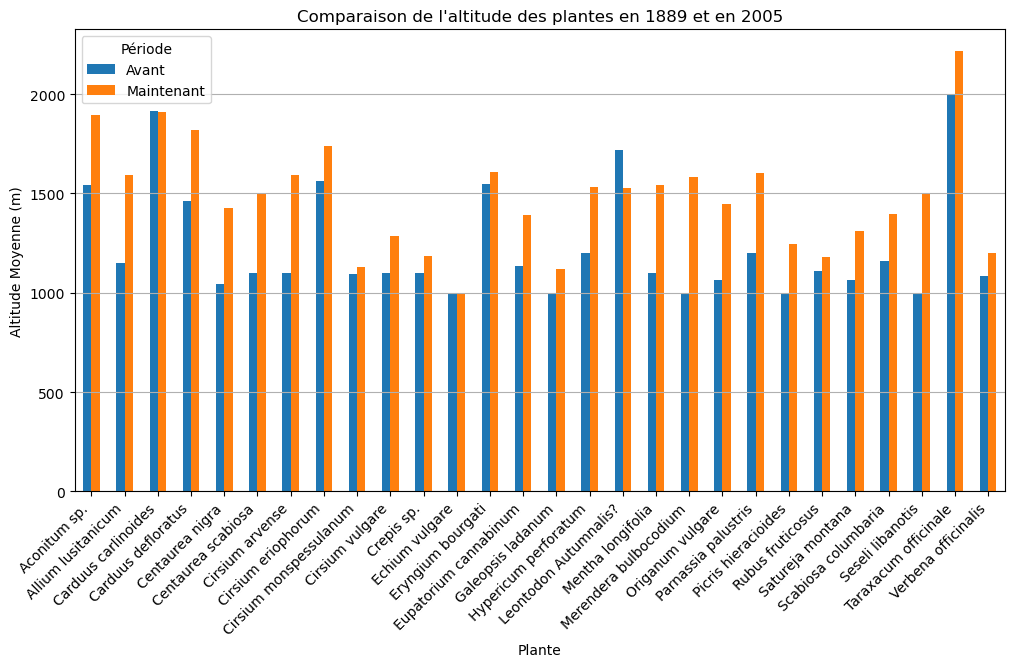

In [117]:
# Identifier les périodes "avant" et "maintenant"
threshold_year = 2000
plants_valid['Period'] = plants_valid['Year'].apply(lambda x: 'Avant' if x < threshold_year else 'Maintenant')

# Calculer l'altitude moyenne par plante et par période
plants_grouped = plants_valid.groupby(['Plant', 'Period'])['MeanEle'].mean().unstack()

# Tracer un graphique en barres
plants_grouped.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Plante')
plt.ylabel('Altitude Moyenne (m)')
plt.title("Comparaison de l'altitude des plantes en 1889 et en 2005")
plt.legend(title='Période')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


In [118]:
df_combined["Date"] = pd.to_datetime(df_combined["Date"], errors="coerce")
df_combined["Year"] = df_combined["Date"].dt.year

# Compter le nombre d'observations pour chaque combinaison (Visitor, Plant)
preferences = df_combined.groupby(["Visitor", "Plant", "Year"]).size().reset_index(name="Count")

# Trouver la plante la plus visitée pour chaque bourdon
preferred_plants = preferences.loc[preferences.groupby(["Year", "Visitor"])["Count"].idxmax()]

#Séparer les résultats pour l'année 1889 et pour 2005-2006
preferred_plants_1889 = preferred_plants[preferred_plants["Year"] == 1889]
preferred_plants_2005_2006 = preferred_plants[preferred_plants["Year"].isin([2005, 2006])]

# Afficher le résultat
print("Plantes préférées pour 1889 :")
print(preferred_plants_1889)
print("\nPlantes préférées pour 2005-2006 :")
print(preferred_plants_2005_2006)



Plantes préférées pour 1889 :
                       Visitor                Plant  Year  Count
13         Bombus gerstaeckeri         Aconitum sp.  1889      4
15             Bombus hortorum         Aconitum sp.  1889     28
51              Bombus humilis   Carduus defloratus  1889      8
84           Bombus lapidarius      Centaurea nigra  1889      8
109              Bombus mendax  Teucrium pyrenaicum  1889      1
118           Bombus mesomelas   Carduus defloratus  1889     20
146           Bombus monticola   Carduus defloratus  1889      1
150             Bombus mucidus        Brunella alba  1889      1
191           Bombus pascuorum  Teucrium scorodonia  1889     14
195            Bombus pratorum     Knautia arvensis  1889      1
202         Bombus quadricolor   Carduus defloratus  1889     10
218          Bombus ruderarius        Brunella alba  1889      2
236            Bombus sichelii   Carduus defloratus  1889     16
265          Bombus soroeensis   Carduus defloratus  1889   

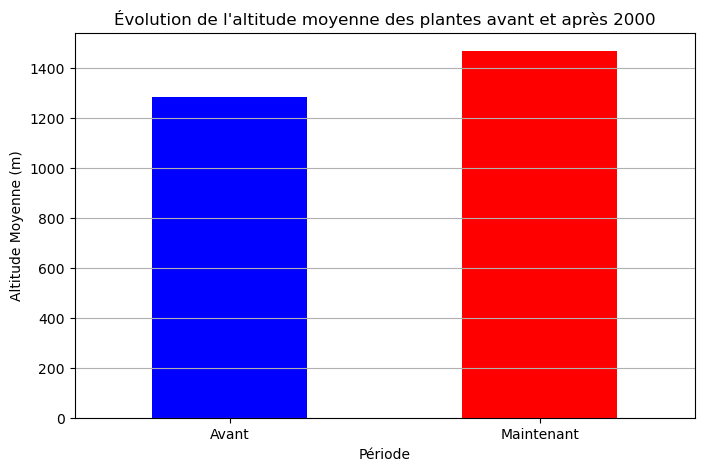

In [119]:
# Identifier les périodes "avant" et "maintenant"
threshold_year = 2000
plants_valid['Period'] = plants_valid['Year'].apply(lambda x: 'Avant' if x < threshold_year else 'Maintenant')

# Calculer la moyenne générale de l'altitude pour chaque période
mean_altitude_by_period = plants_valid.groupby('Period')['MeanEle'].mean()

# Tracer un graphique en barres
mean_altitude_by_period.plot(kind='bar', figsize=(8, 5), color=['blue', 'red'])

# Personnalisation du graphique
plt.xlabel('Période')
plt.ylabel('Altitude Moyenne (m)')
plt.title("Évolution de l'altitude moyenne des plantes avant et après 2000")
plt.xticks(rotation=0)
plt.grid(axis='y')

# Affichage
plt.show()

In [120]:
#intégration de la température
t1 = pd.read_csv("Data/Q_65_previous-1950-2023_RR-T-Vent.csv.gz", sep=";")
t2 = pd.read_csv("Data/Q_65_1863-1949_RR-T-Vent.csv.gz" , sep=";")
tr = pd.read_csv("Data/Regional_August_Temps_1910_2010.csv")

In [121]:
tr

,Grid_ID,Latitude,Longitude,Elevation,Year,variable,value
0,1,42.837086,-0.004172,832.698303,1905,Tave08,15.70
1,2,42.820951,0.010855,914.812805,1905,Tave08,15.10
2,3,42.829890,0.009342,959.433289,1905,Tave08,14.90
3,4,42.803073,0.013879,960.202637,1905,Tave08,15.00
4,5,42.785195,0.016900,1024.201416,1905,Tave08,14.70
...,...,...,...,...,...,...,...
2131,352,42.665108,0.044560,2949.542725,2005,Tmin08,3.27
2132,353,42.670326,0.048393,2970.363525,2005,Tmin08,3.19
2133,354,42.793096,0.121303,3066.392822,2005,Tmin08,2.79
2134,355,42.677916,0.034979,3109.981934,2005,Tmin08,2.53


In [122]:
preferred_plants.dtypes

Visitor    object
Plant      object
Year        int32
Count       int64
dtype: object

In [123]:
print(tr["Year"].unique())  # Vérifie les années présentes
print(tr.dtypes)            # Vérifie le type de chaque colonne
print(tr["value"].max())
print(tr["Elevation"].max())


[1905 2005]
Grid_ID        int64
Latitude     float64
Longitude    float64
Elevation    float64
Year           int64
variable      object
value        float64
dtype: object
23.21
3192.455811


/tmp/ipykernel_1049/3767473526.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_mean_avant = tr_avant.groupby("Altitude_bin")["value"].mean().reset_index()
/tmp/ipykernel_1049/3767473526.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_mean_apres = tr_apres.groupby("Altitude_bin")["value"].mean().reset_index()


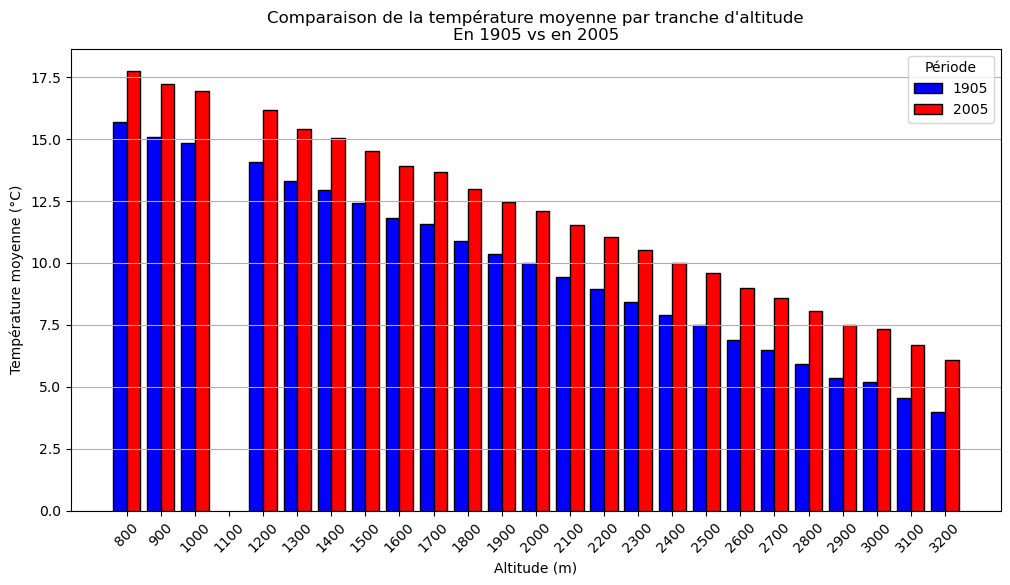

In [124]:
tr = tr[tr["variable"] == "Tave08"].copy()

threshold_year = 2000

tr["Period"] = tr["Year"].apply(lambda x: "Avant" if x < threshold_year else "Maintenant")

tr_avant = tr[tr["Period"] == "Avant"].copy()
tr_apres = tr[tr["Period"] == "Maintenant"].copy()

bins = np.arange(750, 3350, 100)

tr_avant["Altitude_bin"] = pd.cut(tr_avant["Elevation"], bins)
tr_apres["Altitude_bin"] = pd.cut(tr_apres["Elevation"], bins)

temp_mean_avant = tr_avant.groupby("Altitude_bin")["value"].mean().reset_index()
temp_mean_apres = tr_apres.groupby("Altitude_bin")["value"].mean().reset_index()

def bin_midpoint(interval):
    return (interval.left + interval.right) / 2

temp_mean_avant["bin_mid"] = temp_mean_avant["Altitude_bin"].apply(bin_midpoint)
temp_mean_apres["bin_mid"] = temp_mean_apres["Altitude_bin"].apply(bin_midpoint)

merged = pd.merge(
temp_mean_avant, temp_mean_apres, on="Altitude_bin", how="outer", suffixes=("_avant", "_apres")
)
merged = merged.sort_values("bin_mid_avant")
merged["bin_mid"] = merged["bin_mid_avant"].combine_first(merged["bin_mid_apres"]).astype(float)

bar_width = 40
x = merged["bin_mid"]

x_avant = x - bar_width/2
x_apres = x + bar_width/2

plt.figure(figsize=(12, 6))
plt.bar(x_avant, merged["value_avant"], width=bar_width, color="blue", edgecolor="k", label="1905")
plt.bar(x_apres, merged["value_apres"], width=bar_width, color="red", edgecolor="k", label="2005")
plt.xlabel("Altitude (m)")
plt.ylabel("Température moyenne (°C)")
plt.title("Comparaison de la température moyenne par tranche d'altitude\nEn 1905 vs en 2005")
plt.legend(title="Période")
plt.grid(axis="y")
plt.xticks(x, rotation=45)
plt.show()

Attention : Ces plantes préférées ne sont pas dans les données d'altitude pour 1889 : {'Brunella alba', 'Knautia arvensis', 'Succisa pratensis', 'Teucrium scorodonia', 'Teucrium pyrenaicum'}


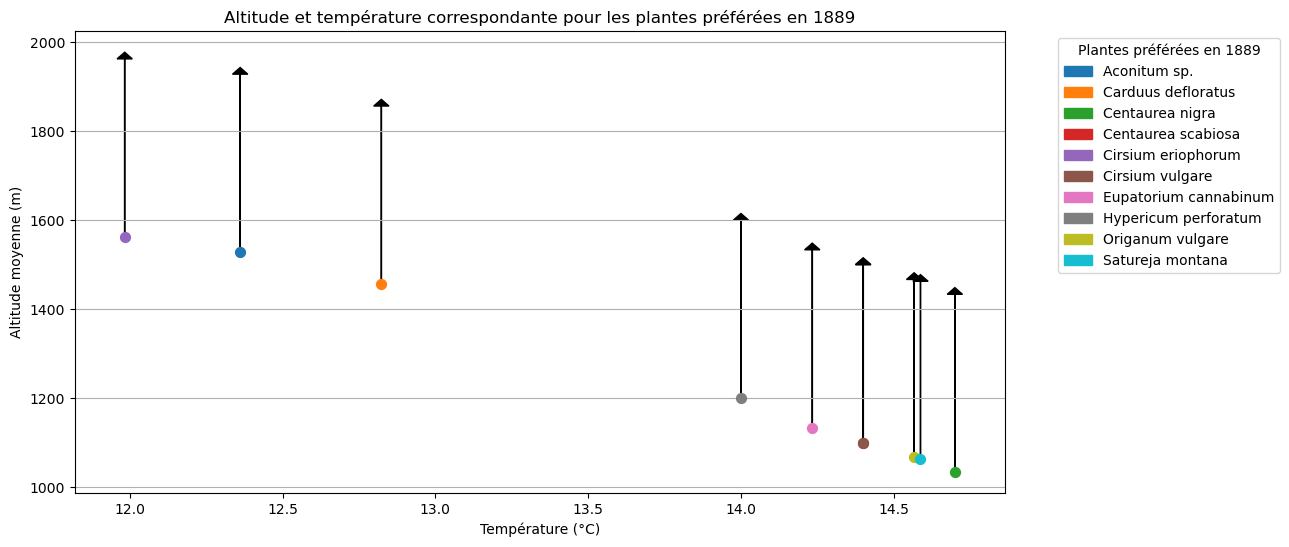

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.patches import Patch

# Charger les données des plantes
df_plants = pd.read_csv("Data/Plant_data_Marshall_et_al_2020.csv")
df_plants["Date"] = pd.to_datetime(df_plants["Date"], dayfirst=True)
df_plants["Year"] = df_plants["Date"].dt.year
df_plants["MeanEle"] = (df_plants["MinEle"].astype(float) + df_plants["MaxEle"].astype(float)) / 2
df_plants["Period"] = df_plants["Year"].apply(lambda x: "Avant" if x < 2000 else "Maintenant")

# Filtrer uniquement les données de 1889
df_plants = df_plants[df_plants["Year"] == 1889]

# Grouper par plante pour obtenir l'altitude moyenne
grouped = df_plants.groupby(["Plant"])["MeanEle"].mean().reset_index()

# Charger les données de température
df_temp = pd.read_csv("Data/Regional_August_Temps_1910_2010.csv")
df_temp = df_temp[df_temp["variable"] == "Tave08"].copy()
df_temp["Elev_round"] = df_temp["Elevation"].round(-1)

# Filtrer uniquement les températures avant 2000
temp_avant = df_temp[df_temp["Year"] < 2000].groupby("Elev_round")["value"].mean().reset_index().sort_values("Elev_round")

# Fonction d'interpolation pour la période "Avant"
f_interp_avant = interp1d(temp_avant["Elev_round"], temp_avant["value"], fill_value="extrapolate")

# Ajouter la température interpolée aux plantes
grouped["Temp"] = grouped["MeanEle"].apply(lambda x: f_interp_avant(x))

# EXTRAIRE LES PLANTES PRÉFÉRÉES
preferred_plant_list = preferred_plants["Plant"].unique()  # Liste des plantes préférées
grouped = grouped[grouped["Plant"].isin(preferred_plant_list)]  # Filtrer les plantes

# Vérifier si des plantes préférées ne sont pas dans grouped
missing_plants = set(preferred_plant_list) - set(grouped["Plant"])
if missing_plants:
    print(f"Attention : Ces plantes préférées ne sont pas dans les données d'altitude pour 1889 : {missing_plants}")

# Créer une figure
plt.figure(figsize=(12, 6))

# Générer une couleur unique pour chaque plante préférée
plants = grouped["Plant"].unique()
colors = {plant: plt.cm.tab10(i % 10) for i, plant in enumerate(plants)}

# Tracer les points uniquement pour 1889
for idx, row in grouped.iterrows():

    plt.scatter(row["Temp"], row["MeanEle"], color=colors[row["Plant"]], marker="o", s=50, zorder=3)
    plt.arrow(row["Temp"], row["MeanEle"], 0, 400, head_width=0.05, head_length=15, fc="black", ec="black")


# Ajouter une légende des plantes (couleur)
patches_plants = [Patch(color=colors[plant], label=plant) for plant in plants]

# Afficher la légende
plt.legend(handles=patches_plants, title="Plantes préférées en 1889", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajouter les labels et le titre
plt.xlabel("Température (°C)")
plt.ylabel("Altitude moyenne (m)")
plt.title("Altitude et température correspondante pour les plantes préférées en 1889")

plt.grid(True, axis="y")

# Afficher le graphique
plt.show()


Attention : Ces plantes préférées ne sont pas dans les données d'altitude pour 1889 : {'Brunella alba', 'Knautia arvensis', 'Succisa pratensis', 'Teucrium scorodonia', 'Teucrium pyrenaicum'}


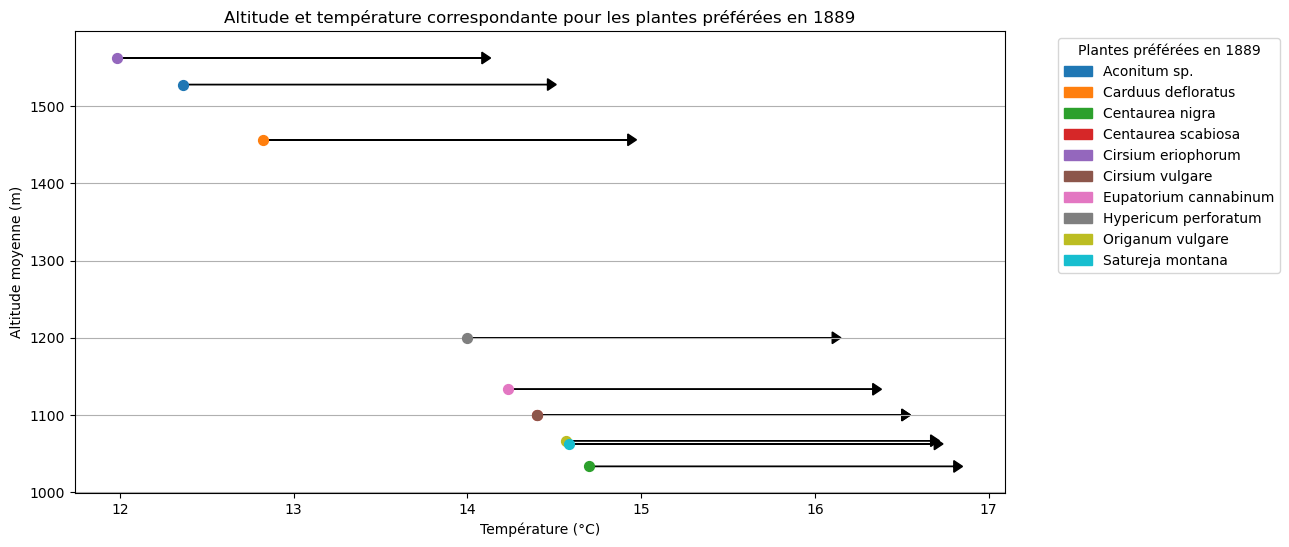

In [126]:
from scipy.interpolate import interp1d
from matplotlib.patches import Patch

# Charger les données des plantes
df_plants = pd.read_csv("Data/Plant_data_Marshall_et_al_2020.csv")
df_plants["Date"] = pd.to_datetime(df_plants["Date"], dayfirst=True)
df_plants["Year"] = df_plants["Date"].dt.year
df_plants["MeanEle"] = (df_plants["MinEle"].astype(float) + df_plants["MaxEle"].astype(float)) / 2
df_plants["Period"] = df_plants["Year"].apply(lambda x: "Avant" if x < 2000 else "Maintenant")

# Filtrer uniquement les données de 1889
df_plants = df_plants[df_plants["Year"] == 1889]

# Grouper par plante pour obtenir l'altitude moyenne
grouped = df_plants.groupby(["Plant"])["MeanEle"].mean().reset_index()

# Charger les données de température
df_temp = pd.read_csv("Data/Regional_August_Temps_1910_2010.csv")
df_temp = df_temp[df_temp["variable"] == "Tave08"].copy()
df_temp["Elev_round"] = df_temp["Elevation"].round(-1)

# Filtrer uniquement les températures avant 2000
temp_avant = df_temp[df_temp["Year"] < 2000].groupby("Elev_round")["value"].mean().reset_index().sort_values("Elev_round")

# Fonction d'interpolation pour la période "Avant"
f_interp_avant = interp1d(temp_avant["Elev_round"], temp_avant["value"], fill_value="extrapolate")

# Ajouter la température interpolée aux plantes
grouped["Temp"] = grouped["MeanEle"].apply(lambda x: f_interp_avant(x))

# EXTRAIRE LES PLANTES PRÉFÉRÉES
preferred_plant_list = preferred_plants["Plant"].unique()  # Liste des plantes préférées
grouped = grouped[grouped["Plant"].isin(preferred_plant_list)]  # Filtrer les plantes

# Vérifier si des plantes préférées ne sont pas dans grouped
missing_plants = set(preferred_plant_list) - set(grouped["Plant"])
if missing_plants:
    print(f"Attention : Ces plantes préférées ne sont pas dans les données d'altitude pour 1889 : {missing_plants}")

# Créer une figure
plt.figure(figsize=(12, 6))

# Générer une couleur unique pour chaque plante préférée
plants = grouped["Plant"].unique()
colors = {plant: plt.cm.tab10(i % 10) for i, plant in enumerate(plants)}

# Tracer les points uniquement pour 1889
for idx, row in grouped.iterrows():

    plt.scatter(row["Temp"], row["MeanEle"], color=colors[row["Plant"]], marker="o", s=50, zorder=3)
    plt.arrow(row["Temp"], row["MeanEle"], 2.1, 0, head_width=15, head_length=0.05, fc="black", ec="black")


# Ajouter une légende des plantes (couleur)
patches_plants = [Patch(color=colors[plant], label=plant) for plant in plants]

# Afficher la légende
plt.legend(handles=patches_plants, title="Plantes préférées en 1889", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajouter les labels et le titre
plt.xlabel("Température (°C)")
plt.ylabel("Altitude moyenne (m)")
plt.title("Altitude et température correspondante pour les plantes préférées en 1889")

plt.grid(True, axis="y")

# Afficher le graphique
plt.show()


Attention : Ces plantes préférées ne sont pas dans les données d'altitude : {'Brunella alba', 'Knautia arvensis', 'Succisa pratensis', 'Teucrium scorodonia', 'Teucrium pyrenaicum'}


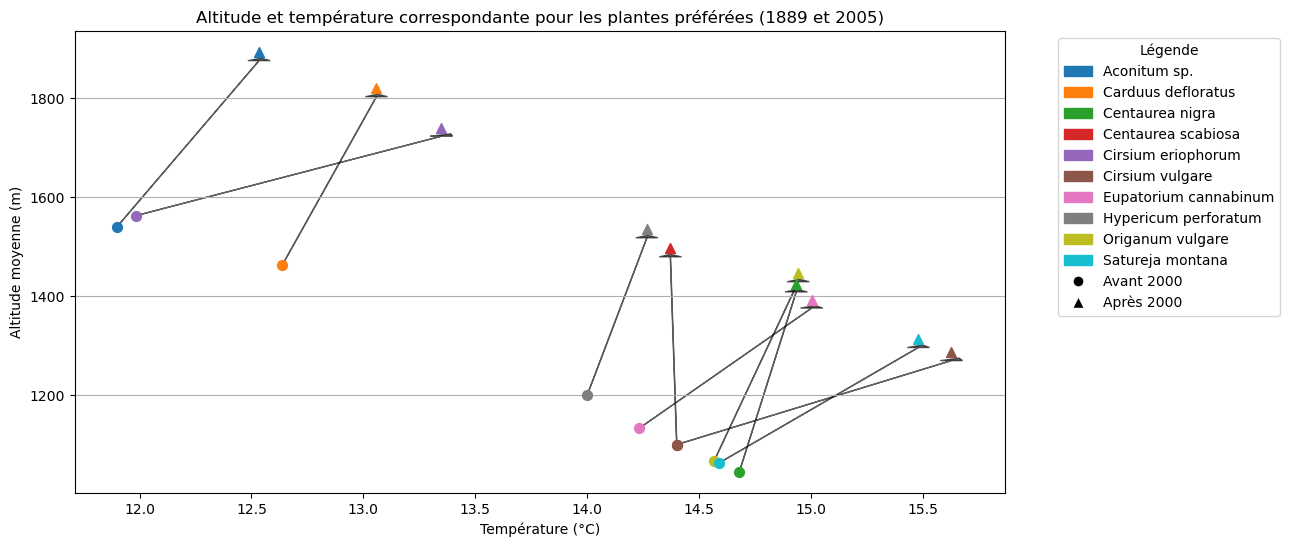

In [140]:
# Charger les données des plantes
df_plants = pd.read_csv("Data/Plant_data_Marshall_et_al_2020.csv")
df_plants["Date"] = pd.to_datetime(df_plants["Date"], dayfirst=True)
df_plants["Year"] = df_plants["Date"].dt.year
df_plants["MeanEle"] = (df_plants["MinEle"].astype(float) + df_plants["MaxEle"].astype(float)) / 2
df_plants["Period"] = df_plants["Year"].apply(lambda x: "Avant" if x < 2000 else "Maintenant")

# Grouper pour obtenir l'altitude moyenne par plante et période
grouped = df_plants.groupby(["Plant", "Period"])["MeanEle"].mean().reset_index()

# Charger les données de température
df_temp = pd.read_csv("Data/Regional_August_Temps_1910_2010.csv")
df_temp = df_temp[df_temp["variable"] == "Tave08"].copy()
df_temp["Elev_round"] = df_temp["Elevation"].round(-1)

temp_avant = df_temp[df_temp["Year"] < 2000].groupby("Elev_round")["value"].mean().reset_index().sort_values("Elev_round")
temp_maintenant = df_temp[df_temp["Year"] >= 2000].groupby("Elev_round")["value"].mean().reset_index().sort_values("Elev_round")

f_interp_avant = interp1d(temp_avant["Elev_round"], temp_avant["value"], fill_value="extrapolate")
f_interp_maintenant = interp1d(temp_maintenant["Elev_round"], temp_maintenant["value"], fill_value="extrapolate")

grouped["Temp"] = grouped.apply(
    lambda row: f_interp_avant(row["MeanEle"]) if row["Period"] == "Avant" else f_interp_maintenant(row["MeanEle"]),
    axis=1
)

# EXTRAIRE LES PLANTES PRÉFÉRÉES
preferred_plant_list = preferred_plants["Plant"].unique()  # Liste des plantes préférées
grouped = grouped[grouped["Plant"].isin(preferred_plant_list)]  # Filtrer les plantes

# Vérifier si des plantes préférées ne sont pas dans grouped
missing_plants = set(preferred_plant_list) - set(grouped["Plant"])
if missing_plants:
    print(f"Attention : Ces plantes préférées ne sont pas dans les données d'altitude : {missing_plants}")

# Créer une figure
plt.figure(figsize=(12, 6))

# Générer une couleur unique pour chaque plante préférée
plants = grouped["Plant"].unique()
colors = {plant: plt.cm.tab10(i % 10) for i, plant in enumerate(plants)}

# Définir les formes pour chaque période
markers = {"Avant": "o", "Maintenant": "^"}

# Tracer les points (NE PAS MODIFIER CE FOR)
for idx, row in grouped.iterrows():
    plt.scatter(row["Temp"], row["MeanEle"], 
                color=colors[row["Plant"]], 
                marker=markers[row["Period"]], 
                s=50, zorder=3)

# Ajouter les flèches entre "Avant" et "Maintenant"
for plant in plants:
    data = grouped[grouped["Plant"] == plant]  # Filtrer par plante
    
    if len(data) == 2:  # Vérifier que la plante a bien les deux périodes
        before = data[data["Period"] == "Avant"]
        after = data[data["Period"] == "Maintenant"]

        if not before.empty and not after.empty:
            x1, y1 = before["Temp"].values[0], before["MeanEle"].values[0]
            x2, y2 = after["Temp"].values[0], after["MeanEle"].values[0]

            # Tracer une flèche reliant les points
            plt.arrow(x1, y1, x2 - x1 , y2 - y1 - 17, 
                      head_width=0.1, head_length=5, fc="black", ec="black", alpha=0.6)

# Ajouter une légende des plantes (couleur)
patches_plants = [Patch(color=colors[plant], label=plant) for plant in plants]

# Ajouter une légende pour les formes (périodes)
patches_periods = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="black", markersize=8, label="Avant 2000"),
    plt.Line2D([0], [0], marker="^", color="w", markerfacecolor="black", markersize=8, label="Après 2000")
]

# Afficher les légendes
plt.legend(handles=patches_plants + patches_periods, title="Légende", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajouter les labels et le titre
plt.xlabel("Température (°C)")
plt.ylabel("Altitude moyenne (m)")
plt.title("Altitude et température correspondante pour les plantes préférées (1889 et 2005)")
plt.grid(True, axis="y")

# Afficher le graphique
plt.show()


Attention : Ces plantes préférées ne sont pas dans les données d'altitude : {'Brunella alba', 'Knautia arvensis', 'Succisa pratensis', 'Teucrium scorodonia', 'Teucrium pyrenaicum'}


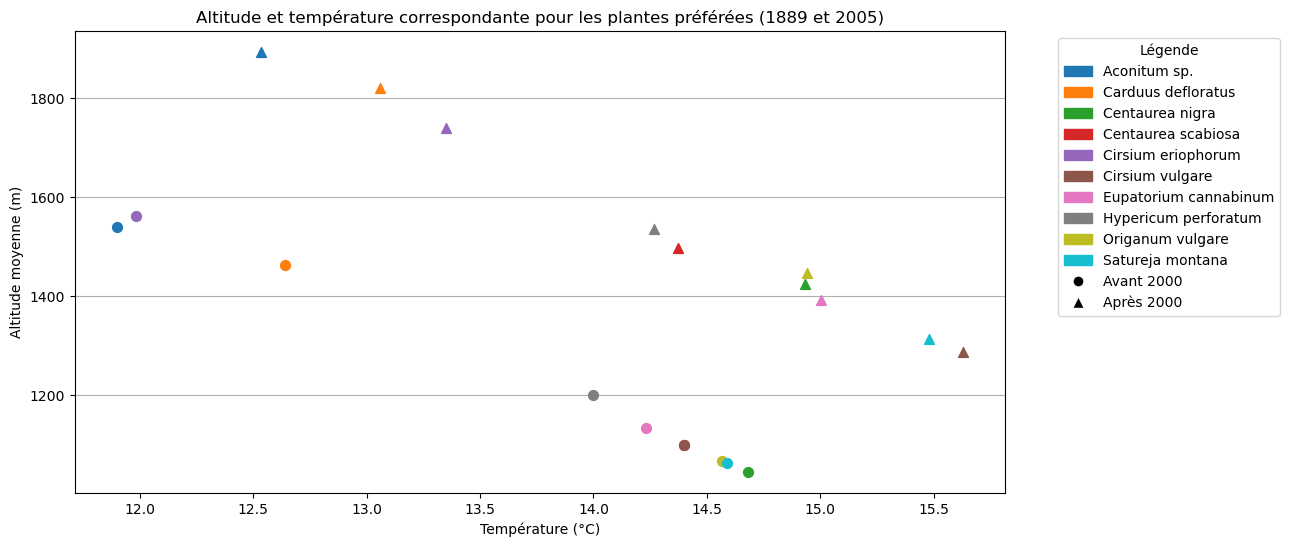

In [128]:
# Charger les données des plantes
df_plants = pd.read_csv("Data/Plant_data_Marshall_et_al_2020.csv")
df_plants["Date"] = pd.to_datetime(df_plants["Date"], dayfirst=True)
df_plants["Year"] = df_plants["Date"].dt.year
df_plants["MeanEle"] = (df_plants["MinEle"].astype(float) + df_plants["MaxEle"].astype(float)) / 2
df_plants["Period"] = df_plants["Year"].apply(lambda x: "Avant" if x < 2000 else "Maintenant")
grouped = df_plants.groupby(["Plant", "Period"])["MeanEle"].mean().reset_index()

# Charger les données de température
df_temp = pd.read_csv("Data/Regional_August_Temps_1910_2010.csv")
df_temp = df_temp[df_temp["variable"] == "Tave08"].copy()
df_temp["Elev_round"] = df_temp["Elevation"].round(-1)

temp_avant = df_temp[df_temp["Year"] < 2000].groupby("Elev_round")["value"].mean().reset_index().sort_values("Elev_round")
temp_maintenant = df_temp[df_temp["Year"] >= 2000].groupby("Elev_round")["value"].mean().reset_index().sort_values("Elev_round")

f_interp_avant = interp1d(temp_avant["Elev_round"], temp_avant["value"], fill_value="extrapolate")
f_interp_maintenant = interp1d(temp_maintenant["Elev_round"], temp_maintenant["value"], fill_value="extrapolate")

grouped["Temp"] = grouped.apply(
    lambda row: f_interp_avant(row["MeanEle"]) if row["Period"] == "Avant" else f_interp_maintenant(row["MeanEle"]),
    axis=1
)

# EXTRAIRE LES PLANTES PRÉFÉRÉES
preferred_plant_list = preferred_plants["Plant"].unique()  # Liste des plantes préférées
grouped = grouped[grouped["Plant"].isin(preferred_plant_list)]  # Filtrer les plantes

# Vérifier si des plantes préférées ne sont pas dans grouped
missing_plants = set(preferred_plant_list) - set(grouped["Plant"])
if missing_plants:
    print(f"Attention : Ces plantes préférées ne sont pas dans les données d'altitude : {missing_plants}")

# Créer une figure
plt.figure(figsize=(12, 6))

# Générer une couleur unique pour chaque plante préférée
plants = grouped["Plant"].unique()
colors = {plant: plt.cm.tab10(i % 10) for i, plant in enumerate(plants)}

# Définir les formes pour chaque période
markers = {"Avant": "o", "Maintenant": "^"}

# Tracer les points avec des couleurs et formes spécifiques
for idx, row in grouped.iterrows():
    plt.scatter(row["Temp"], row["MeanEle"], 
                color=colors[row["Plant"]], 
                marker=markers[row["Period"]], 
                s=50, zorder=3)

# Ajouter une légende des plantes (couleur)
patches_plants = [Patch(color=colors[plant], label=plant) for plant in plants]

# Ajouter une légende pour les formes (périodes)
patches_periods = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="black", markersize=8, label="Avant 2000"),
    plt.Line2D([0], [0], marker="^", color="w", markerfacecolor="black", markersize=8, label="Après 2000")
]

# Afficher les légendes
plt.legend(handles=patches_plants + patches_periods, title="Légende", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajouter les labels et le titre
plt.xlabel("Température (°C)")
plt.ylabel("Altitude moyenne (m)")
plt.title("Altitude et température correspondante pour les plantes préférées (1889 et 2005)")
plt.grid(True, axis="y")

# Afficher le graphique
plt.show()

In [129]:
df_plants = pd.read_csv("Data/Plant_data_Marshall_et_al_2020.csv")
df_plants["Date"] = pd.to_datetime(df_plants["Date"], dayfirst=True)
df_plants["month"] = df_plants["Date"].dt.month

In [130]:
df_plants["month"].nunique()

1

In [131]:
df_combined["Date"] = pd.to_datetime(df_plants["Date"], dayfirst=True)
df_combined["month"] = df_plants["Date"].dt.month
df_combined["month"].unique()

array([8], dtype=int32)